# Домашняя работа 8. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #8: Name Surname`. Если тема будет неправильная, то задание не будет проверено.
6. Дедлайн: 18.12.2017 01:00 OMSK
7. После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

Рассылка решений: 25.12.2017 17:00 OMSK
После рассылки задания почти совсем не имеют веса.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиции деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('data/winequality-red.csv.gz', delimiter = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


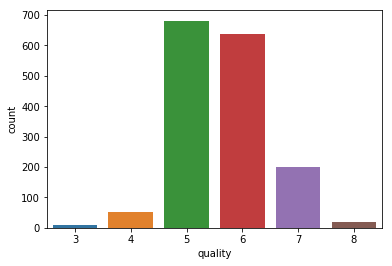

In [5]:
sns.countplot(x='quality', data=df);

In [8]:
dfq = df.quality
print(dfq.describe()[:3])
dfq.value_counts()/dfq.shape[0]

count    1599.000000
mean        5.636023
std         0.807569
Name: quality, dtype: float64


5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

Больше 82% объектов представляют средние оценки качества - это 5 и 6 (примерно в равных долях).
Чуть меньше 14% - качество выше среднего (оценки 7 и 8, причем 7 на порядок больше, чем 8).
Остальное, около 4% - качество ниже среднего (оценки 4 и 3). Оценки низшего (0,1,2) и высшего качества (9,10) отсутсвуют вовсе. 

In [9]:
X = df.copy()
X.drop(df.columns[-1], axis=1, inplace=True)
y = dfq

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [37]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10,  n_jobs=-1)

scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy KNeighborsClassifier: {}".format(scores.mean()))
print("StdAccuracy KNeighborsClassifier: {}".format(scores.std()))

Accuracy KNeighborsClassifier: 0.5122198275862069
StdAccuracy KNeighborsClassifier: 0.02646141016093271


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

scores_sc = cross_val_score(clf, scaler.fit(X).transform(X), y, cv=kfold, scoring='accuracy')
print("Accuracy KNeighborsClassifier with StandartScaler: {}".format(scores_sc.mean()))
print("StdAccuracy KNeighborsClassifier with StandartScaler: {}".format(scores_sc.std()))

Accuracy KNeighborsClassifier with StandartScaler: 0.5797531347962382
StdAccuracy KNeighborsClassifier with StandartScaler: 0.014703387246407617


In [54]:
from sklearn.linear_model import RidgeClassifier
rclf = RidgeClassifier(random_state=42)

scores_r = cross_val_score(rclf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy RidgeClassifier: {}".format(scores_r.mean()))
print("StdAccuracy RidgeClassifier: {}".format(scores_r.std()))

Accuracy RidgeClassifier: 0.5835384012539185
StdAccuracy RidgeClassifier: 0.03996649901617024


In [53]:
from sklearn.tree import DecisionTreeClassifier
tclf = DecisionTreeClassifier(criterion='gini', random_state=42)

scores_t = cross_val_score(tclf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy DecisionTreeClassifier: {}".format(scores_t.mean()))
print("StdAccuracy DecisionTreeClassifier: {}".format(scores_t.std()))

Accuracy DecisionTreeClassifier: 0.6185207680250783
StdAccuracy DecisionTreeClassifier: 0.03447258606453839


In [52]:
from sklearn.ensemble import BaggingClassifier
bclf = BaggingClassifier(n_estimators=100, random_state=42)

scores_b = cross_val_score(bclf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy BaggingClassifier: {}".format(scores_b.mean()))
print("StdAccuracy BaggingClassifier: {}".format(scores_b.std()))

Accuracy BaggingClassifier: 0.6954604231974921
StdAccuracy BaggingClassifier: 0.03094218455257584


In [137]:
b2clf = BaggingClassifier(n_estimators=100, max_features=0.5, random_state=42)

scores_b2 = cross_val_score(b2clf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy BaggingClassifier2: {}".format(scores_b2.mean()))
print("StdAccuracy BaggingClassifier2: {}".format(scores_b2.std()))

Accuracy BaggingClassifier2: 0.6992163009404389
StdAccuracy BaggingClassifier2: 0.024966088618518425


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, random_state=42)

scores_rf = cross_val_score(rfclf, X, y, cv=kfold, scoring='accuracy')
print("Accuracy RandomForestClassifier: {}".format(scores_rf.mean()))
print("StdAccuracy RandomForestClassifier: {}".format(scores_rf.std()))

Accuracy RandomForestClassifier: 0.7010913009404389
StdAccuracy RandomForestClassifier: 0.02870367053847068


### 1.3 Рассуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

При масштабировании признаков параметры в прогнозной формуле модели будут сопоставимы по весу. То есть, влияние каждого из признаков на прогноз будет оптимальным, "перекоса" в сторону численно бОльших признаков не будет, а это в свою очередь улучшает качество предсказания по сравнению с моделью, построенной на немасштабированных признаках.

В деревьях разбиения данных происходят по каждому из важных признаков отдельно и не зависят от масштаба (шкалы) этих признаков. Следовательно, масштабирование признаков не даст какого-либо эффекта улучшения предсказания в этом случае.

Меньшее количество признаков, используемых при построении каждого из деревьев, уменьшает переобучение. Кроме того,  набор признаков в каждом дереве разный, и это тоже улучшает обобщающую способность. В итоге качество предсказания оказывается лучше, чем с использованием всего набора признаков.

In [96]:
ls = {'KNeighborsClassifier' : scores.std(), 'KNeighborsClassifier with StandartScaler' : scores_sc.std(), 
      'RidgeClassifier': scores_r.std(), 'DecisionTreeClassifier' : scores_t.std(), 
      'BaggingClassifier' : scores_b.std(), 'BaggingClassifier2' : scores_b2.std(), 
      'RandomForestClassifier' :scores_rf.std()
     }
i=np.argmax(list(ls.values()))
print('наибольшее отклонение от среднего качества предсказаний у ', list(ls.keys())[i])

наибольшей отклонение от среднего качества предсказаний у  RidgeClassifier


Возможно, уменьшить это отклонение поможет подбор другого коэффициента регуляризации в параметрах RidgeClassifier.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятсья делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

(1797, 64)


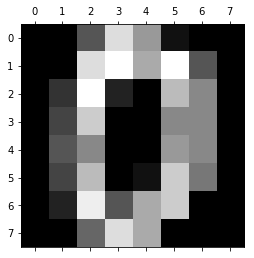

In [115]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0])
plt.show()

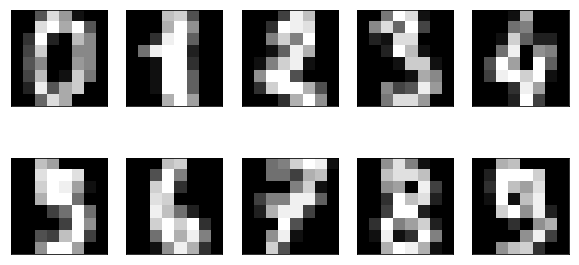

In [110]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),  subplot_kw={'xticks':(), 'yticks': ()}) 
for ax, img in zip(axes.ravel(), digits.images):     
    ax.imshow(img) 

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [120]:
scores_t_dig = cross_val_score(tclf, digits.data, digits.target, cv=10, scoring='accuracy')
print("Accuracy DecisionTreeClassifier: {}".format(scores_t_dig.mean()))
print("StdAccuracy DecisionTreeClassifier: {}".format(scores_t_dig.std()))

Accuracy DecisionTreeClassifier: 0.8370850802141552
StdAccuracy DecisionTreeClassifier: 0.04023050598893108


In [121]:
scores_b_dig = cross_val_score(bclf, digits.data, digits.target, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier: {}".format(scores_b_dig.mean()))
print("StdAccuracy BaggingClassifier: {}".format(scores_b_dig.std()))

Accuracy BaggingClassifier: 0.9266223799121667
StdAccuracy BaggingClassifier: 0.0333050023022444


In [171]:
max_features = np.sqrt(digits.data.shape[1])/digits.data.shape[1]
print(max_features)
max_samples = np.sqrt(digits.data.shape[0])/digits.data.shape[0]
max_samples

0.125


0.02358989248105358

In [145]:
b2clf_dig = BaggingClassifier(n_estimators=100, max_features=max_features, random_state=42)

scores_b2_dig = cross_val_score(b2clf_dig, digits.data, digits.target, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier2: {}".format(scores_b2_dig.mean()))
print("StdAccuracy BaggingClassifier2: {}".format(scores_b2_dig.std()))

Accuracy BaggingClassifier2: 0.9311692335245662
StdAccuracy BaggingClassifier2: 0.035212933332060735


In [147]:
b2clf_dig = BaggingClassifier(n_estimators=100, max_samples=max_samples, random_state=42)

scores_b2_dig = cross_val_score(b2clf_dig, digits.data, digits.target, cv=10, scoring='accuracy')
print("Accuracy BaggingClassifier2: {}".format(scores_b2_dig.mean()))
print("StdAccuracy BaggingClassifier2: {}".format(scores_b2_dig.std()))

Accuracy BaggingClassifier2: 0.8842805311704337
StdAccuracy BaggingClassifier2: 0.03511104888573251


In [143]:
scores_rf_dig = cross_val_score(rfclf, digits.data, digits.target, cv=10, scoring='accuracy')
print("Accuracy RandomForestClassifier: {}".format(scores_rf_dig.mean()))
print("StdAccuracy RandomForestClassifier: {}".format(scores_rf_dig.std()))

Accuracy RandomForestClassifier: 0.9533106688723997
StdAccuracy RandomForestClassifier: 0.020680012777850015


### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 
Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

Параметр max_features задает кол-во случайно выбираемых признаков при расщеплении дерева в каждом узле: по одному из этих признаков дерево и будет расщепляться в конкретном узле. То есть, max_features задает кол-во ПРИЗНАКОВ, участвующих в РАЗБИЕНИИ дерева. А что вы имели ввиду под максимальным кол-вом признаков, участвующих в обучении?

Не нашла, какой параметр BaggingClassifier отвечает за максимальное кол-во ПРИЗНАКОВ, участвующих при ОБУЧЕНИИ каждого дерева, поэтому изменила max_samples - он отвечает за размер бутстреп-выборки обучения каждого дерева. 

В данном случае ограничение бутстреп-выборки сработало хуже, чем ограничение кол-ва признаков в разбиении.
Видимо деревья, построенные на маленьких бутстреп-выборках и полном множестве признаков меньше различаются между собой, чем деревья, построенные на небольших подмножествах признаков и полной выборке примеров. Качество же модели предсказания тем лучше, чем более различные деревья используются при обучении. 

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [173]:
trees = [1,5,10,15,50,100,150,200,300]
scores_rfc = []
for i in trees:
    rfclf = RandomForestClassifier(n_estimators=i, random_state=42)
    scores_rfc.append(cross_val_score(rfclf, digits.data, digits.target, cv=10, scoring='accuracy').mean())
    print("Accuracy RandomForestClassifier with number trees {0}: {1}".format(i, scores_rfc[-1]))

Accuracy RandomForestClassifier with number trees 1: 0.7616357335517535
Accuracy RandomForestClassifier with number trees 5: 0.8837028696742983
Accuracy RandomForestClassifier with number trees 10: 0.9272021217853512
Accuracy RandomForestClassifier with number trees 15: 0.9417178614258364
Accuracy RandomForestClassifier with number trees 50: 0.9550113864646358
Accuracy RandomForestClassifier with number trees 100: 0.9533106688723997
Accuracy RandomForestClassifier with number trees 150: 0.9483315557062137
Accuracy RandomForestClassifier with number trees 200: 0.9499738687012123
Accuracy RandomForestClassifier with number trees 300: 0.9516229909014159


Cамое хорошее качество 0.9550113864646358 получается при 50 деревьях


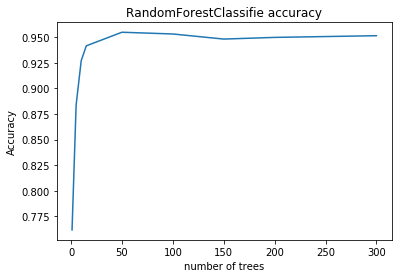

In [174]:
plt.plot(trees, scores_rfc)

plt.title('RandomForestClassifie accuracy')
plt.xlabel('number of trees')
plt.ylabel('Accuracy')

print('Cамое хорошее качество {0} получается при {1} деревьях'.format(np.max(scores_rfc), trees[np.argmax(scores_rfc)]))

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

In [168]:
max_features = np.arange(1, digits.data.shape[1]+1, 5)
scores_rfc = []
for i in max_features:
    rfclf = RandomForestClassifier(n_estimators=100, max_features=i, random_state=42)
    scores_rfc.append(cross_val_score(rfclf, digits.data, digits.target, cv=10, scoring='accuracy').mean())
    print("Accuracy RandomForestClassifier with max_features {0}: {1}".format(i, scores_rfc[-1]))

Accuracy RandomForestClassifier with max_features 1: 0.9516677940478291
Accuracy RandomForestClassifier with max_features 6: 0.953933310762423
Accuracy RandomForestClassifier with max_features 11: 0.9493848946768569
Accuracy RandomForestClassifier with max_features 16: 0.9483527505184675
Accuracy RandomForestClassifier with max_features 21: 0.9455129700361912
Accuracy RandomForestClassifier with max_features 26: 0.947165576736286
Accuracy RandomForestClassifier with max_features 31: 0.9421185369636189
Accuracy RandomForestClassifier with max_features 36: 0.9415557417601939
Accuracy RandomForestClassifier with max_features 41: 0.943772229797925
Accuracy RandomForestClassifier with max_features 46: 0.9377141633937913
Accuracy RandomForestClassifier with max_features 51: 0.9344113386204496
Accuracy RandomForestClassifier with max_features 56: 0.9287774082264129
Accuracy RandomForestClassifier with max_features 61: 0.9255022817409175


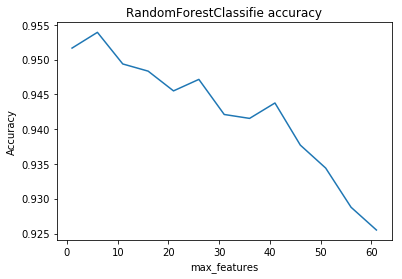

In [169]:
plt.plot(max_features, scores_rfc)

plt.title('RandomForestClassifie accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

С ростом числа деревьев случайного леса снижается переобучение и, как следствие, улучшается качество, но когда деревьев слишком много серьезно возрастают временные затраты и объем используемой памяти. Поэтому 5000 деревьев вряд ли смогут всегда осчастливить исследователя - нужно задавать оптимальное кол-во деревьев с учетом затрат по времени и памяти. 

С уменьшением значения max_features улучшается качество также, как и с ростом числа деревьев, за счет снижения переобучения, поскольку деревья получаются разнообразными по набору признаков в разбиениях.

max_depth - опция предварительной обрезки деревьев задает глубину построения дерева, чтобы предотвратить переобучение, что, в свою очередь, улучшит качество предсказания. Чем глубже дерево, тем правильнее оно работает на обучающей выборке, но хуже обобщает результат на новых данных. Ограничение глубины дерева улучшит тестовую правильность, правда за счет снижения обучающей правильности.

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)